In [ ]:
# Random forest algorithm
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime as dt
import sklearn.model_selection as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
from sklearn.preprocessing import MinMaxScaler


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pandas_datareader import data
from pylab import plt
import yfinance as yf
yf.pdr_override()

In [ ]:
df = data.get_data_yahoo(tickers='^HSI',start='2012-01-01', end='2022-12-31')


[*********************100%***********************]  1 of 1 completed


In [ ]:
random_len=10#The number of random number seeds
est_tree=100#The number of trees in the random forest
train_rate=0.7#The length of the training set was segmented
df=data.get_data_yahoo(tickers='^HSI',start='2012-01-01', end='2022-12-31')
indexp=[]
for item in df.index:
  s=str(item)
  indexp.append(s)
features=df.filter(['Open','High','Low','Close'])
n_f=df.filter(['Volume'])
n_f=n_f.values
# n_f1=df.filter(['Adj Close'])
# n_f1=n_f1.values
scaler=MinMaxScaler(feature_range=(1000,10000))#保持成交量和成交额在同一数量级
# n_f,n_f1=scaler.fit_transform(n_f),scaler.fit_transform(n_f1)
n_f=scaler.fit_transform(n_f)
features['Volume']=n_f
# features['Adj Close']=n_f1
# features['pro_rate']=np.log(features['Close'] / features['Close'].shift(1))#计算收益率
features=features.replace(np.nan,0)
train_data_len=math.floor(len(features)*train_rate)
newdate=df.index
x_date=newdate[train_data_len:]
print(features)

[*********************100%***********************]  1 of 1 completed
                    Open           Low         Close       Volume
Date                                                             
2012-01-03  18770.640625  18724.169922  18877.410156  2578.689429
2012-01-04  18970.599609  18687.939453  18727.310547  2479.559049
2012-01-05  18753.380859  18723.279297  18813.410156  2310.230292
2012-01-06  18784.859375  18506.580078  18593.060547  2814.672300
2012-01-09  18588.359375  18302.839844  18865.720703  2747.457739
...                  ...           ...           ...          ...
2022-12-22  19537.449219  19475.679688  19679.220703  3454.618767
2022-12-23  19382.230469  19380.470703  19593.060547  2725.680313
2022-12-28  19787.939453  19787.939453  19898.910156  4573.214952
2022-12-29  19648.400391  19539.839844  19741.140625  4672.653078
2022-12-30  20030.849609  19781.410156  19781.410156  3211.550030

[2708 rows x 4 columns]


In [ ]:
#准备好标签和特征组
def label_data(features):
    labels=np.array(features['Close'])
    features=features.drop('Close',axis=1)#The label column is removed from the feature values
    # features=features.drop('index',axis=1)
    feature_list=list(features.columns)
    features=np.array(features)
    return labels,feature_list,features
labels,feature_list,features=label_data(features)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
rf=RandomForestRegressor(n_estimators=est_tree,random_state=random_len)
rf.fit(X_train,y_train)
predtion=rf.predict(X_test)
print(predtion)

[20176.63208984 23341.96748047 26294.42648437 22156.62988281
 26379.33134766 23117.78460938 20992.69292969 24399.27617188
 26400.60566406 22086.11896484 30421.46595703 21175.26882813
 21955.42523438 22426.70587891 21006.74912109 25134.03064453
 19791.02835937 23383.53425781 25660.71837891 28948.34964844
 29943.65705078 27725.59390625 30002.98300781 29605.67558594
 28368.60023438 17582.70771484 23650.17384766 25910.02199219
 26200.09564453 24822.39376953 23560.36521484 27175.29197266
 26310.779375   25069.28300781 21731.06748047 30121.02566406
 25485.02125    26572.59710938 23220.25322266 26813.29306641
 27048.27046875 23189.85466797 28247.38775391 24107.77962891
 28732.69927734 26112.30802734 23679.88705078 22913.99849609
 24820.29935547 23603.02376953 28458.08767578 28898.30462891
 19755.19492188 20141.37070313 18908.03978516 29642.45783203
 23047.01003906 20594.48935547 27475.80652344 22360.52691406
 19349.37080078 20772.81027344 20667.86708984 25678.08886719
 28749.25894531 23374.52

In [ ]:
from sklearn.metrics import mean_squared_error
accuracy = 0.
for i in range(len(predtion)):
  # accuracy += abs(d[i]-test_predict[i])
     accuracy += (y_test[i]-abs(y_test[i]-predtion[i]))/y_test[i]
accuracy=accuracy/len(predtion)
print('accuracy:', accuracy)

mse = mean_squared_error(y_test, predtion)
print(mse)

accuracy: 0.9957559479788121
20272.393023771336


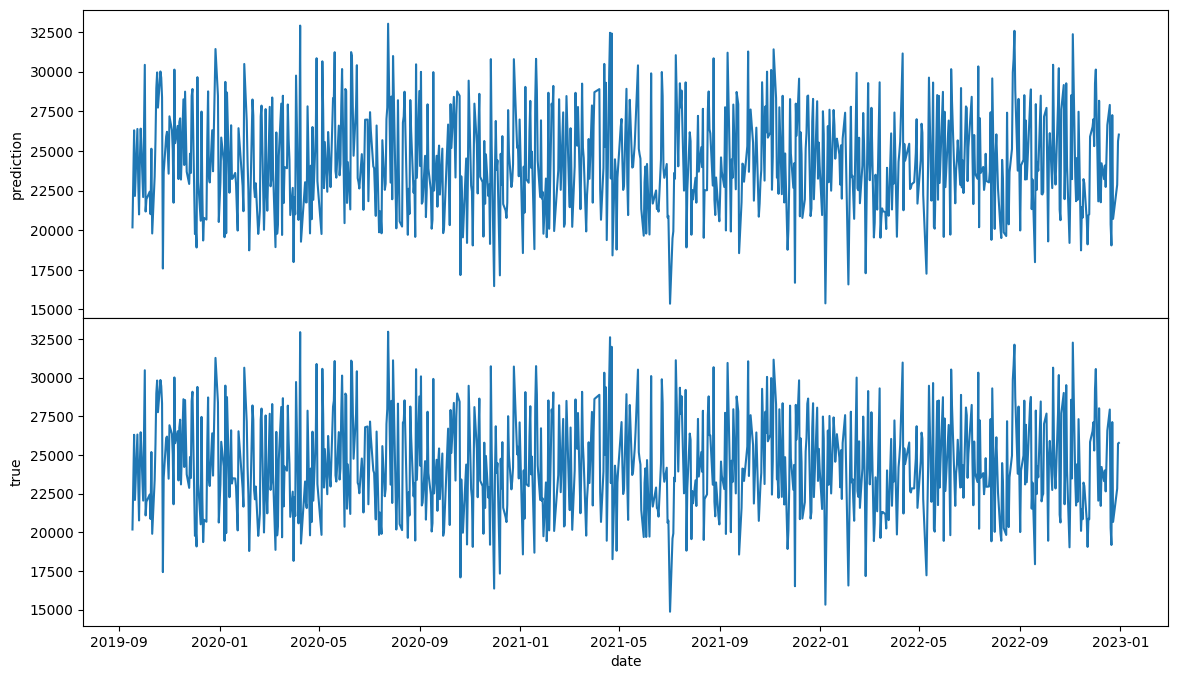

In [ ]:
fig,axs=plt.subplots(2,1,sharex=True,figsize=(14,8))
axs[0].plot(x_date,predtion)
axs[0].set_ylabel("prediction")
axs[1].plot(x_date,y_test)
axs[1].set_ylabel("true")
plt.subplots_adjust(hspace=0)
plt.xlabel('date')
plt.show()
plt.close()